In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [18]:
# Load dataset from URL
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Load dataset from URL
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', names=["label", "message"])
df.head()

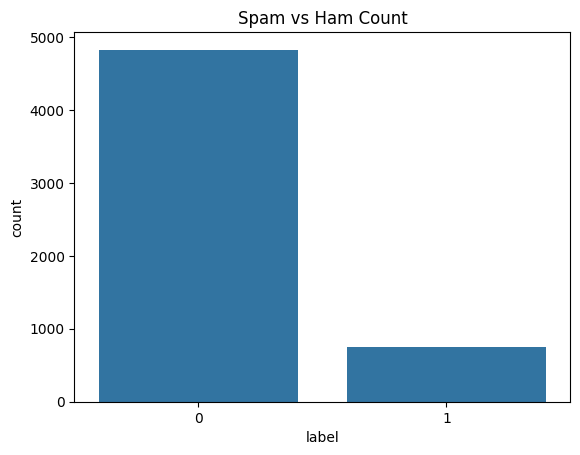

In [19]:
# Convert labels to binary
df["label"] = df["label"].map({"ham": 0, "spam": 1})

# Check class distribution
sns.countplot(x="label", data=df)
plt.title("Spam vs Ham Count")
plt.show()

In [20]:
X = df["message"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Convert text to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [22]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [23]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9919282511210762

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115


Confusion Matrix:
 [[966   0]
 [  9 140]]


In [24]:
def predict_message(msg):
    msg_vec = vectorizer.transform([msg])
    prediction = model.predict(msg_vec)
    return "Spam" if prediction[0] == 1 else "Ham"

# Example test
predict_message("Congratulations! You've won a free iPhone. Click here to claim.")
#predict_message("Thank you")

'Spam'